<a href="https://colab.research.google.com/github/NishaimLimbu/classes/blob/main/Image_recognition(cifar_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers, models, datasets


In [51]:
# Load data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [52]:
x_train.shape

(50000, 32, 32, 3)

In [53]:
x_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
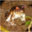

In [54]:
x_train[0]

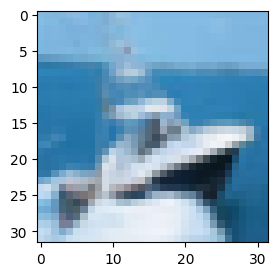

In [55]:
plt.figure(figsize=(15,3))
plt.imshow(x_train[8])

In [56]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [57]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [58]:
# Class labels
classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog','horse', 'ship', 'truck']

In [59]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,4))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

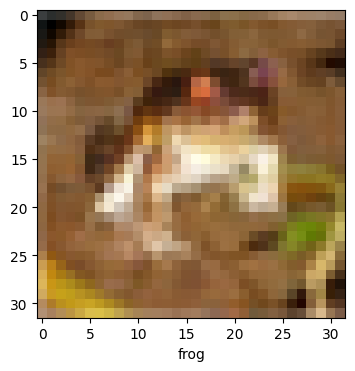

In [60]:
plot_sample(x_train,y_train,0)

In [61]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [62]:
# Build the CNN
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # ← properly closed here
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
# Compile model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [64]:
# Train model
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3350 - loss: 1.7843
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5780 - loss: 1.1936
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6463 - loss: 0.9958
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6924 - loss: 0.8748
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7255 - loss: 0.7874


In [65]:
# Evaluate model
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7038 - loss: 0.8500


[0.8681501746177673, 0.6988999843597412]

In [66]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[7.1284380e-03, 4.2375661e-03, 1.2848841e-02, 8.1763768e-01,
        8.2710925e-03, 1.1973530e-01, 1.1598891e-02, 3.5151336e-03,
        1.2306534e-02, 2.7203977e-03],
       [5.2513342e-02, 7.0928916e-02, 7.0798305e-05, 1.4902406e-05,
        1.9817633e-05, 1.1787577e-06, 6.2321319e-06, 5.7448500e-07,
        8.7587738e-01, 5.6684716e-04],
       [1.7031185e-02, 3.2446571e-02, 1.6670224e-03, 3.3772418e-03,
        1.1252547e-03, 4.2538348e-04, 1.3082344e-03, 4.7783222e-04,
        9.3161935e-01, 1.0521903e-02],
       [6.3258153e-01, 9.0232054e-03, 4.0666338e-02, 9.0558082e-03,
        2.1901293e-02, 1.0532964e-03, 4.3699513e-03, 1.3681864e-03,
        2.6257446e-01, 1.7405886e-02],
       [2.5418319e-04, 2.1764966e-04, 3.6428742e-02, 9.5159216e-03,
        4.9526043e-02, 7.1038475e-04, 9.0255237e-01, 5.2829684e-05,
        6.8521104e-04, 5.6587891e-05]], dtype=float32)

In [67]:
# Predict
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:15]

[np.int64(3),
 np.int64(8),
 np.int64(8),
 np.int64(0),
 np.int64(6),
 np.int64(6),
 np.int64(1),
 np.int64(6),
 np.int64(3),
 np.int64(9),
 np.int64(4),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(9)]

In [68]:
y_test = y_test.reshape(-1,)

In [69]:
# actual
y_test[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

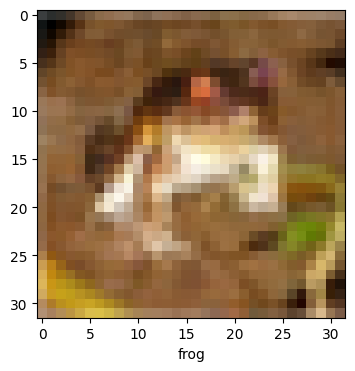

In [70]:
plot_sample(x_train,y_train,0)

In [71]:
classes[y_classes[19]] #True

'frog'

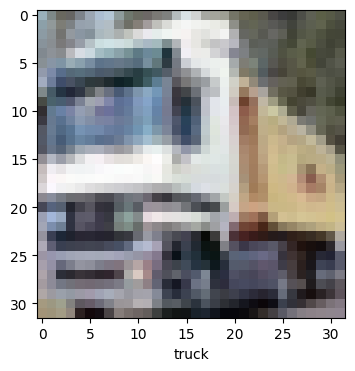

In [72]:
plot_sample(x_train,y_train,1)

In [73]:
classes[y_classes[1]]  #False

'ship'

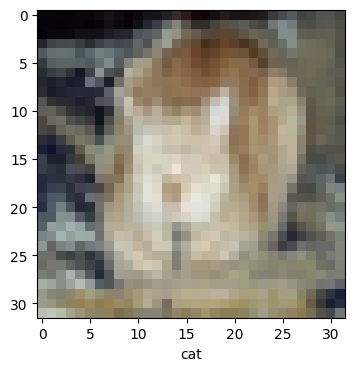

In [74]:
plot_sample(x_train,y_train,33)

In [75]:
classes[y_classes[33]]  #True

'cat'

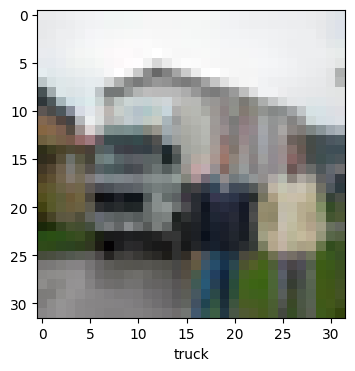

In [76]:
plot_sample(x_train,y_train,16)

In [77]:
classes[y_classes[16]] #False

'dog'

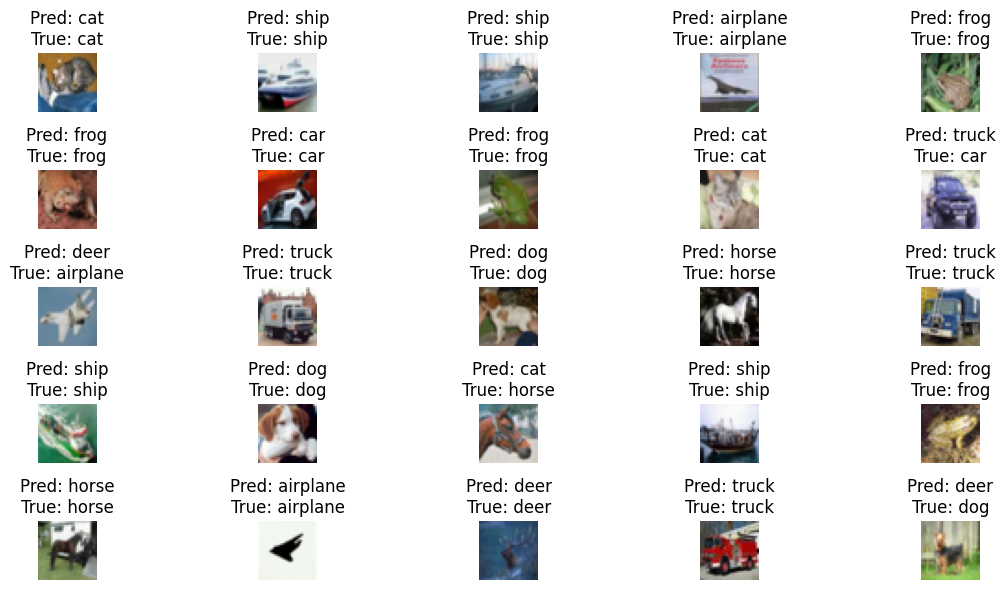

In [78]:
plt.figure(figsize=(12,6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {classes[y_classes[i]]}\nTrue: {classes[y_test[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [79]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_classes)

Text(0.5, 1.0, 'Confusion Matrix with Class Names')

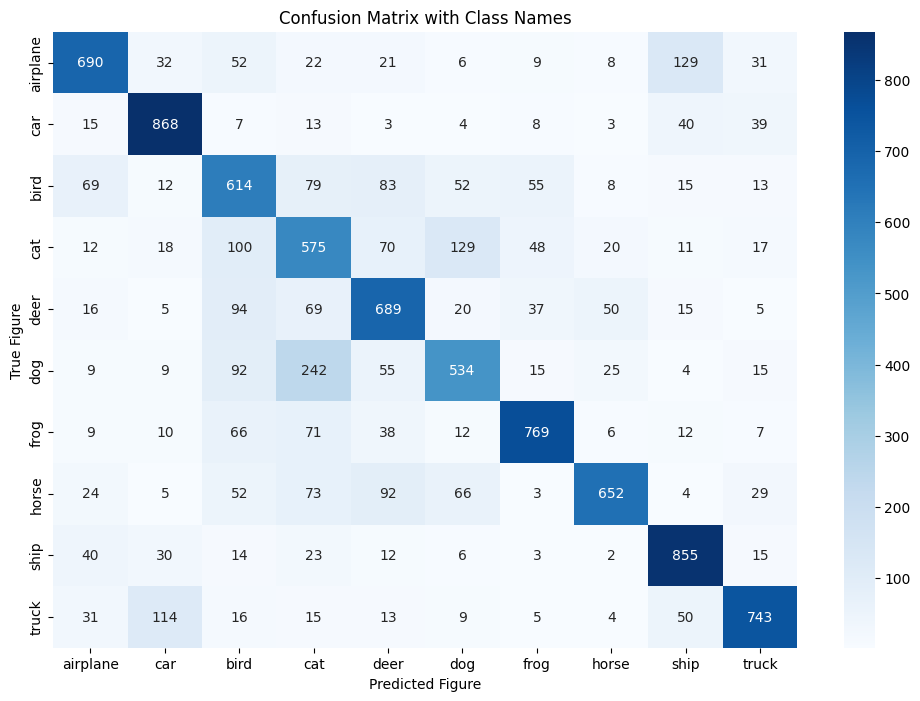

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True,fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.xlabel('Predicted Figure')
plt.ylabel('True Figure')
plt.title('Confusion Matrix with Class Names')

* 0 : Airplane
* 1 : Car
* 2 : Bird
* 3 : Cat
* 4 : Deer
* 5 : Dog
* 6 : frog
* 7 : Horse
* 8 : Ship
* 9: Truck